## Simple Linear Regression - Minimal example

### Import the relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Generate random input data to train on

Entradas = N x K, ou seja, 1000 x 2

In [2]:
observations = 5000

xs = np.random.uniform(low = -10, high = 10, size = (observations, 1))
zs = np.random.uniform(-10, 10, size = (observations, 1))

inputs = np.column_stack((xs, zs))
inputs.shape

(5000, 2)

### Create the targets we will aim at

      Alvos    =     f(x, z)    =   2 * x   -    3 * z     +      5    +      ruído
    1000 x 1                       1000 x 1     1000 x 1        escalar      1000 x 1 

In [3]:
noise = np.random.uniform(-1, 1, (observations, 1))
targets = 2 * xs - 3 * zs + 5 + noise

### Plot the training data

The point is to see that there is a strong trend that our model should lern to reproduce

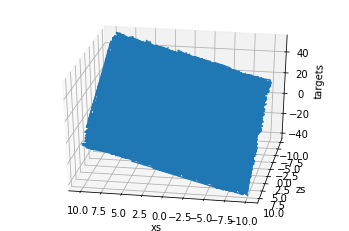

In [4]:
targets = targets.reshape(observations,)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs, zs, targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('targets')
ax.view_init(azim=100)
plt.show()

targets = targets.reshape(observations, 1)

### Initialize variables

    W = Tamanho 2 x 1, b = 1 x 1

In [5]:
init_range = 0.1

weights = np.random.uniform(-init_range, init_range, size=(2, 1))

biases = np.random.uniform(-init_range, init_range, size=1)

weights.shape, biases.shape

((2, 1), (1,))

In [6]:
weights, biases

(array([[ 0.0302192 ],
        [-0.01077332]]), array([0.02213117]))

### Set a learning rate

In [7]:
learning_rate = 0.01

### Train the model

Plano de cada iteração:
    * Calcular saídas
    * Comparar os resultados com os alvos através da perda
    * Ajustar pesos e vieses

In [8]:
for i in range(300):
    outputs = np.dot(inputs, weights) + biases
    deltas = outputs - targets
    
    loss = np.sum(deltas ** 2) / 2 / observations
    print(loss)
    
    deltas_scaled = deltas / observations
    
    weights = weights - learning_rate * np.dot(inputs.T, deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)

230.13042814674574
108.1164844650648
54.25023991648434
30.397916072780244
19.76596625589555
14.95868951155943
12.719049443622483
11.612624642548765
11.007655477362537
10.625869367677033
10.344668597798382
10.110015215444593
9.898065910818497
9.698276069435174
9.505958766078765
9.319007703278256
9.136453956904193
8.957830337979187
8.782891434258335
8.611490296730095
8.44352411467692
8.278910274584526
8.117575800909616
7.959452690773839
7.804475844764066
7.652582141408351
7.503710015639214
7.357799259504207
7.214790921032233
7.074627246596769
6.937251642697098
6.802608646547295
6.670643900794678
6.541304130302256
6.41453712008064
6.290291693961718
6.168517693829982
6.049165959325691
5.93218830797766
5.817537515742632
5.705167297936777
5.595032290548694
5.487088031925096
5.38129094482125
5.277598318808605
5.1759682930324855
5.076359839312774
4.978732745580745
4.883047599645429
4.789265773282819
4.697349406641626
4.607261392959193
4.518965363581451
4.432425673280836
4.34760738586627
4.2644

### Print weights and biases and see if we have worked correctly

In [9]:
weights, biases

(array([[ 1.99953273],
        [-3.00036884]]), array([4.76524169]))

### Brinque com o código. Tente diferentes:
* 1) números de observações
* 2) learning rate
* 3) número de iterações
* 4) intervalo inicial para inicializar pesos e desvios
    

### Plot last outputs vs targets

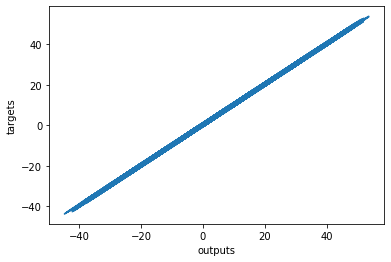

In [10]:
plt.plot(outputs, targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()